# Firebaseのセットアップと静的コンテンツデプロイのメモ

> [Firebase Set Up \-Firebaseでwebページを公開するまで\-](https://tech.airis0.com/blog/firebase-set-up/) を参考に、Firebaseプロジェクトの作成、ローカル開発環境の構築、静的コンテンツのデプロイを行ってみたときのメモです。

- toc: true
- badges: false
- comments: false
- categories: [firebase,]

## Firebaseプロジェクトの作成

1. [Firebase](https://firebase.google.com/) にアクセスする
2. `使ってみる` をクリック

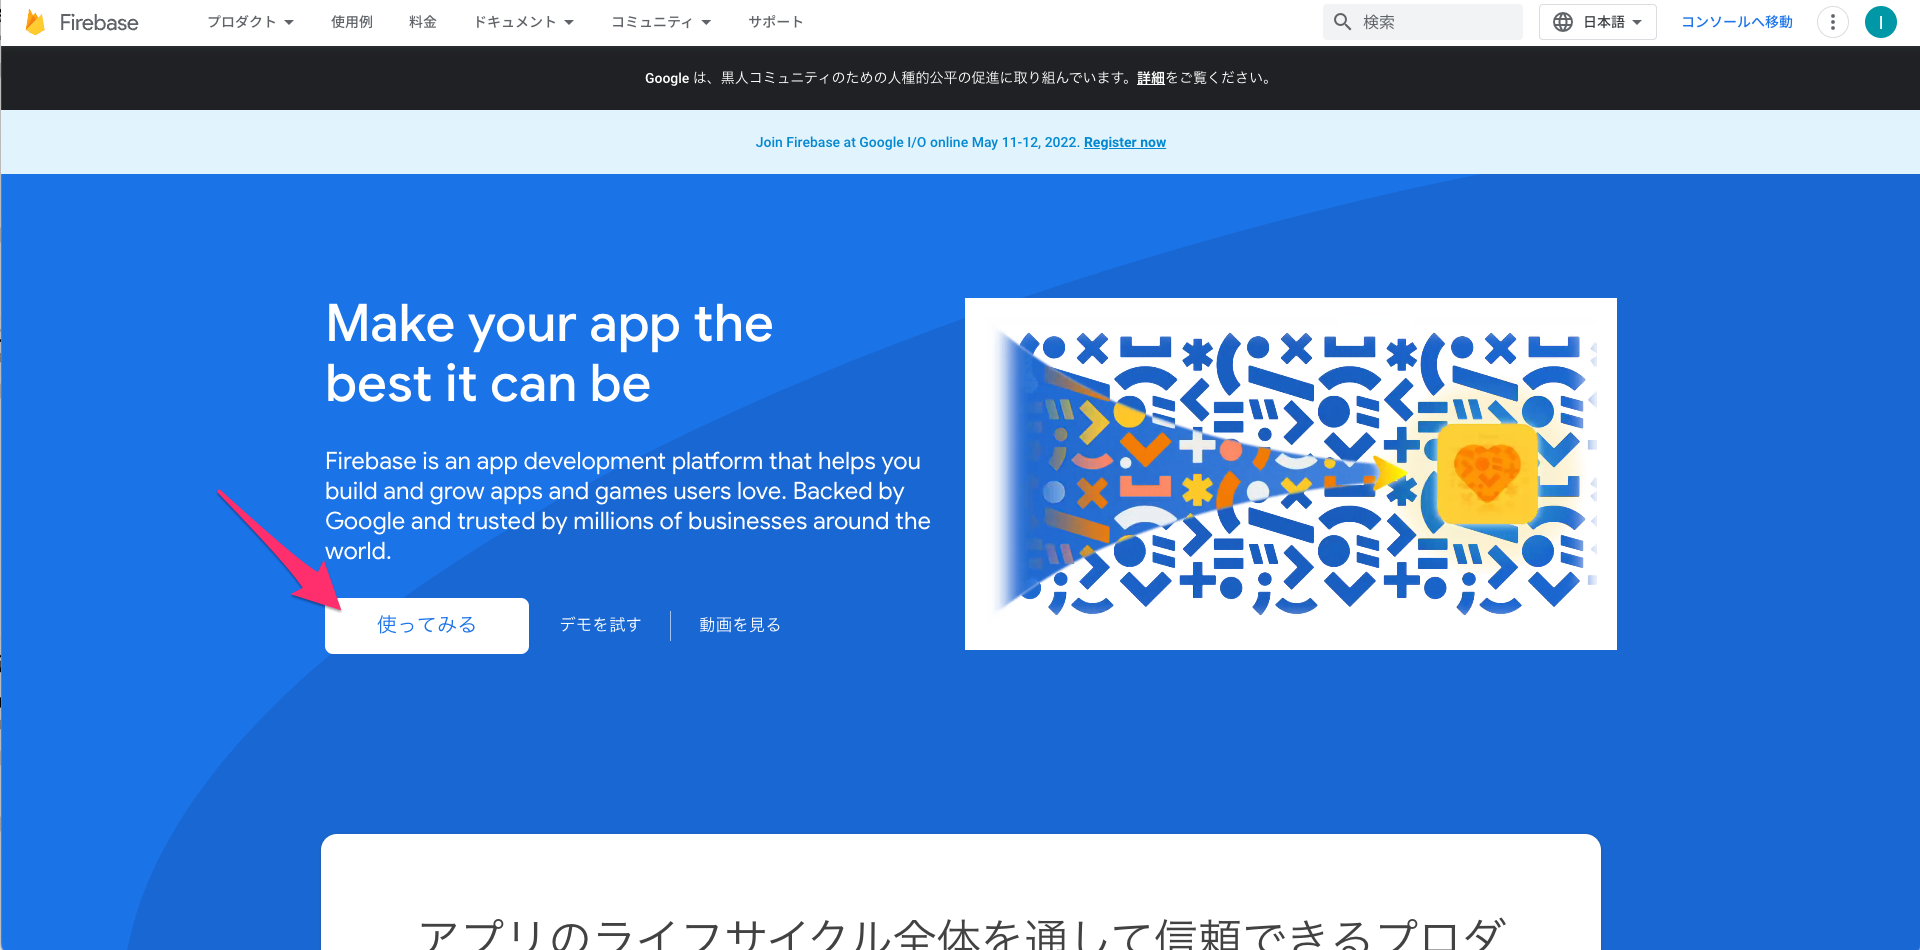

3. `Firebaseへようこそ`と表示される
    - Googleアカウントにログインしていると、右上にアカウントのアイコンが表示される
    - 複数のアカウントを所有している場合は、意図したアカウントか確認しておく 
    - ログインしていない場合は右上に`ログイン`と表示されるので、クリックしてログインする

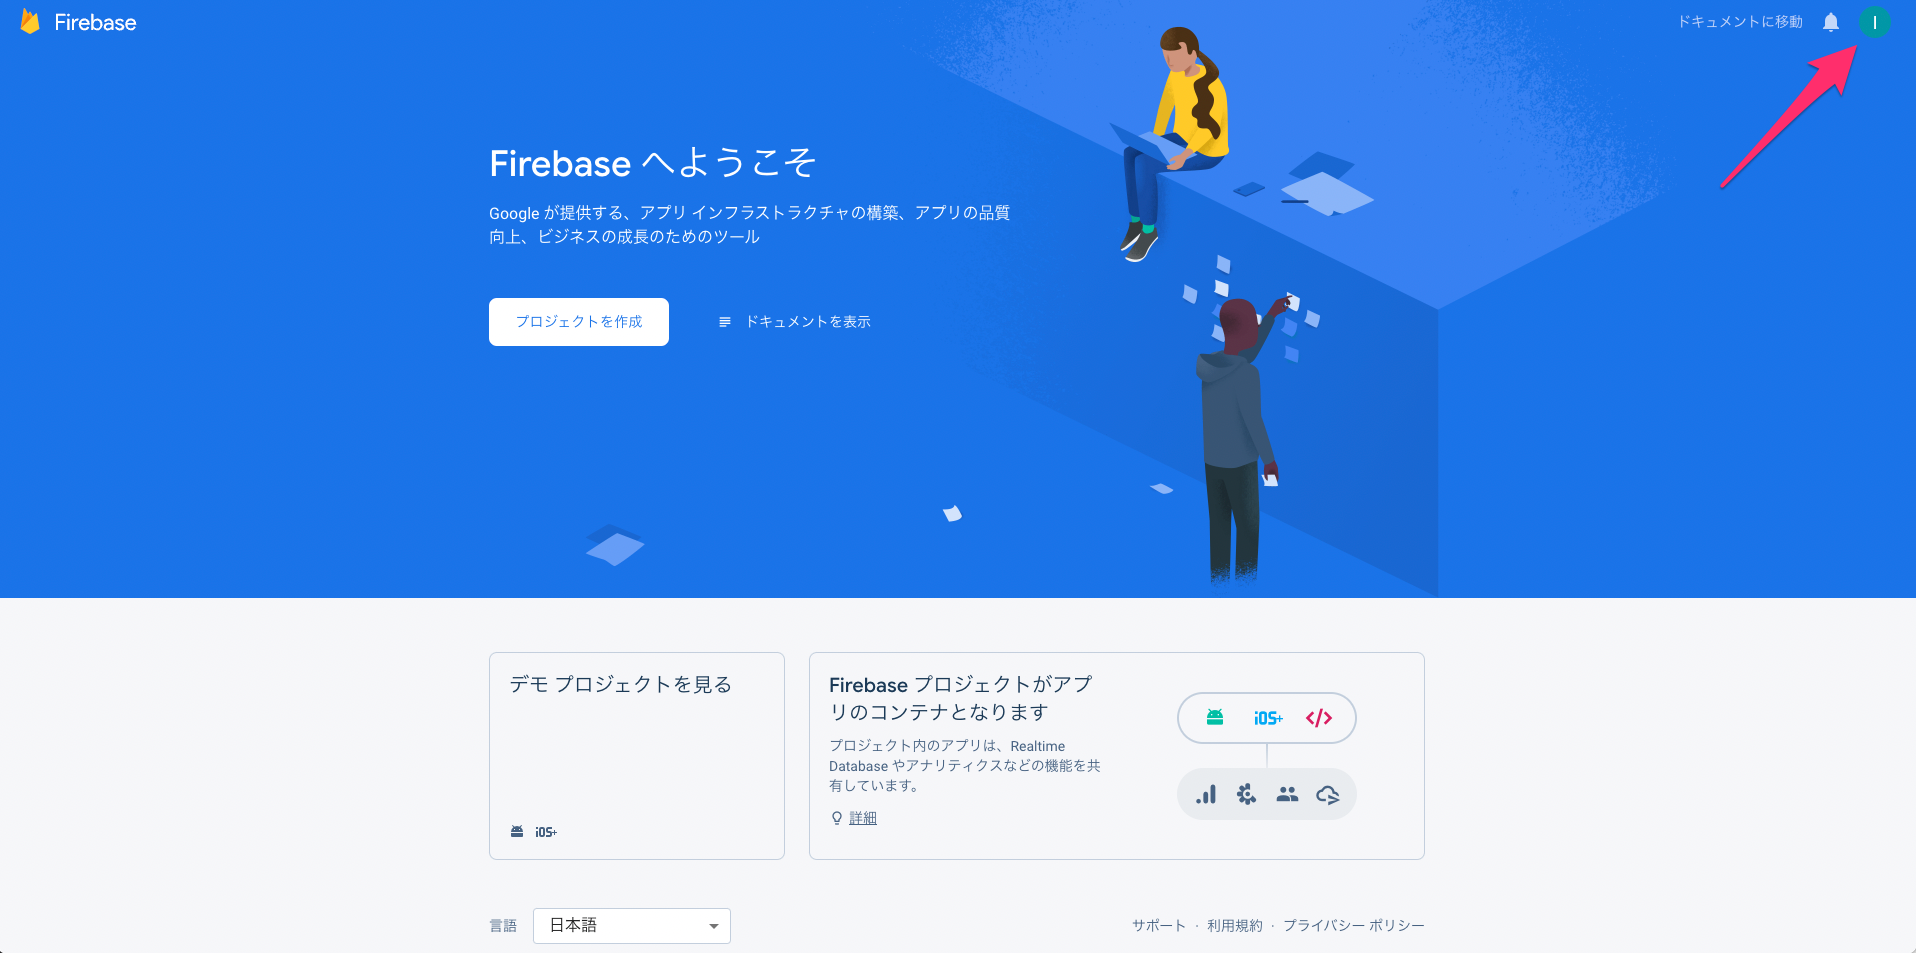

4. `プロジェクトを作成`をクリック

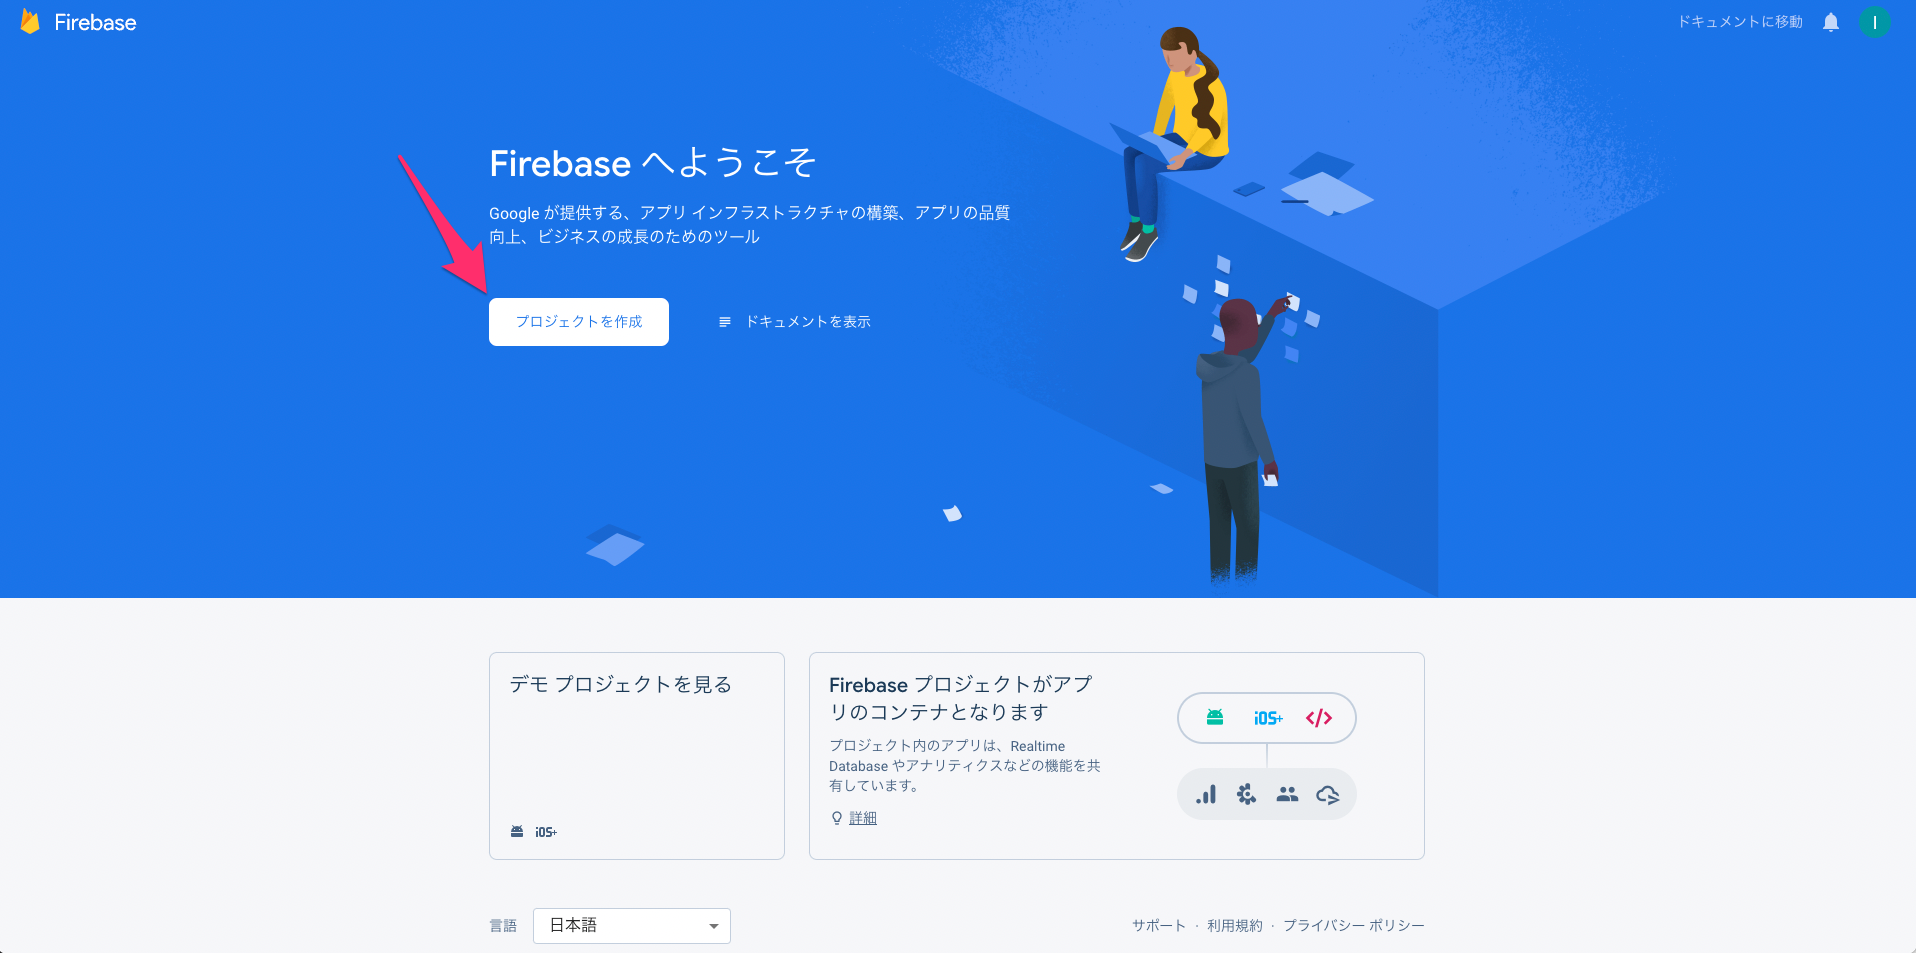

5. プロジェクトの作成画面(1/3) が表示されるので、プロジェクト名を入力し、利用規約、自身の取引(以下略)を確認し、`続行`

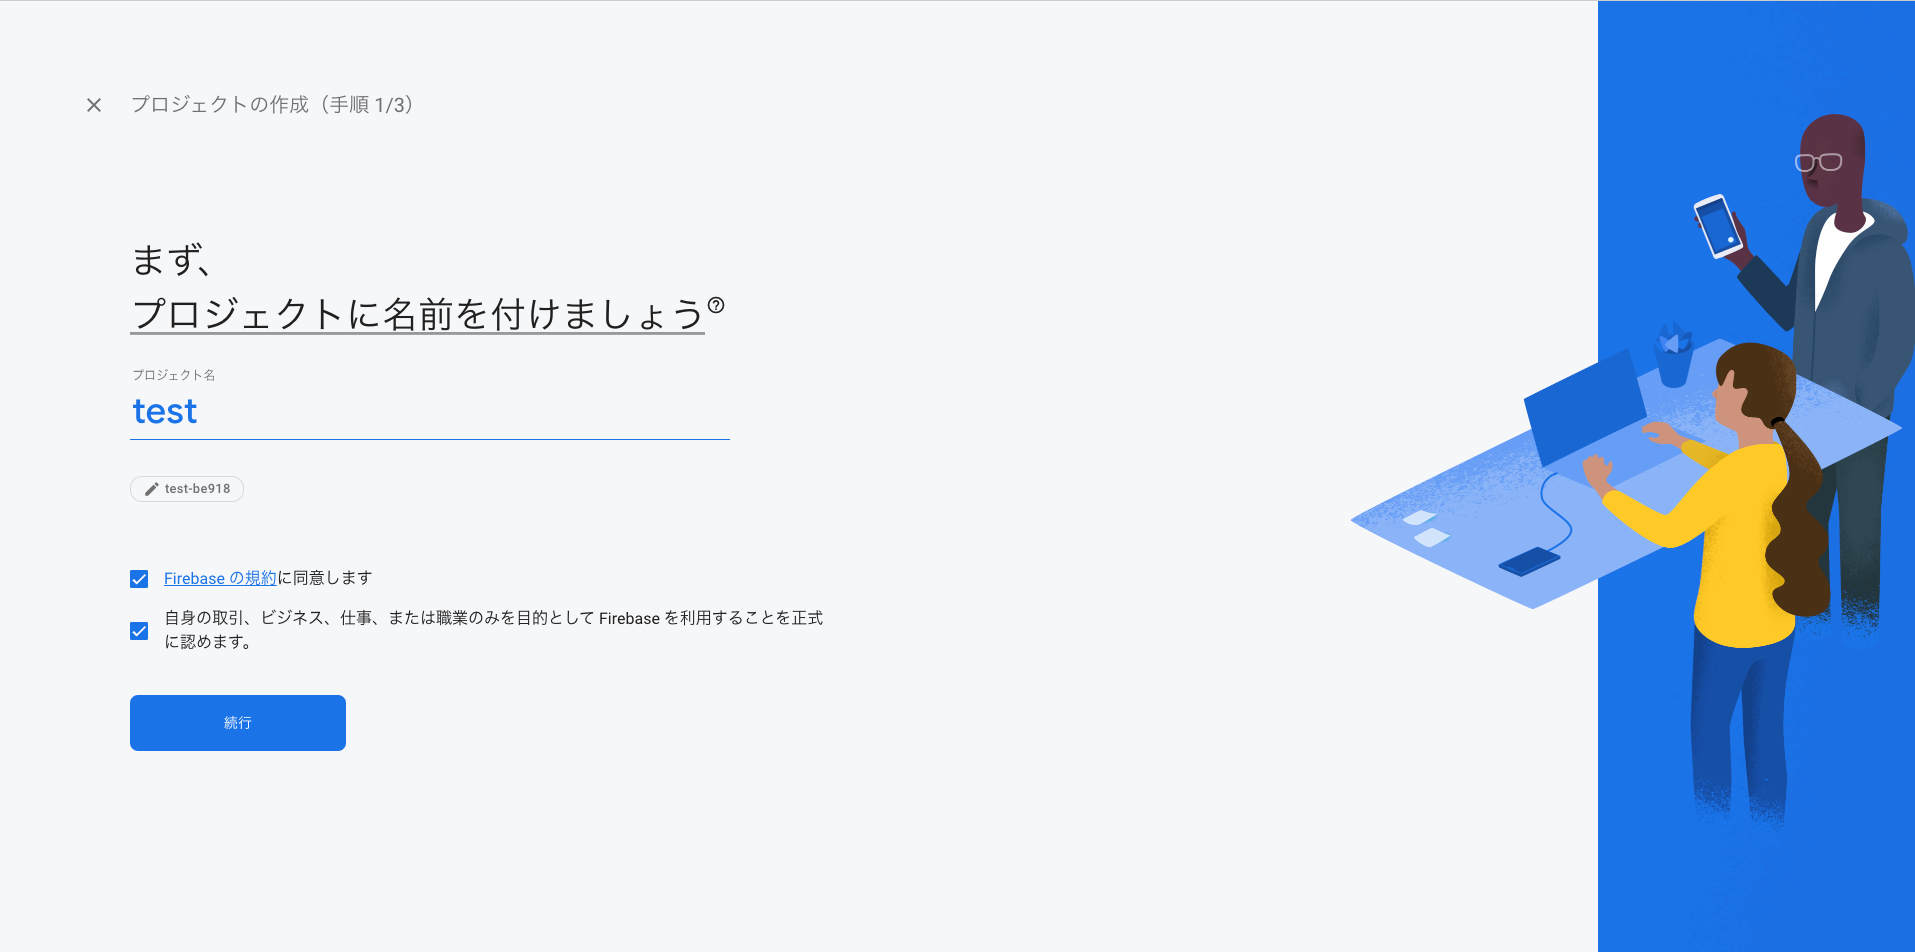

5. プロジェクトの作成(2/3) が表示されるので、Googleアナリティクスを有効にし、`続行`

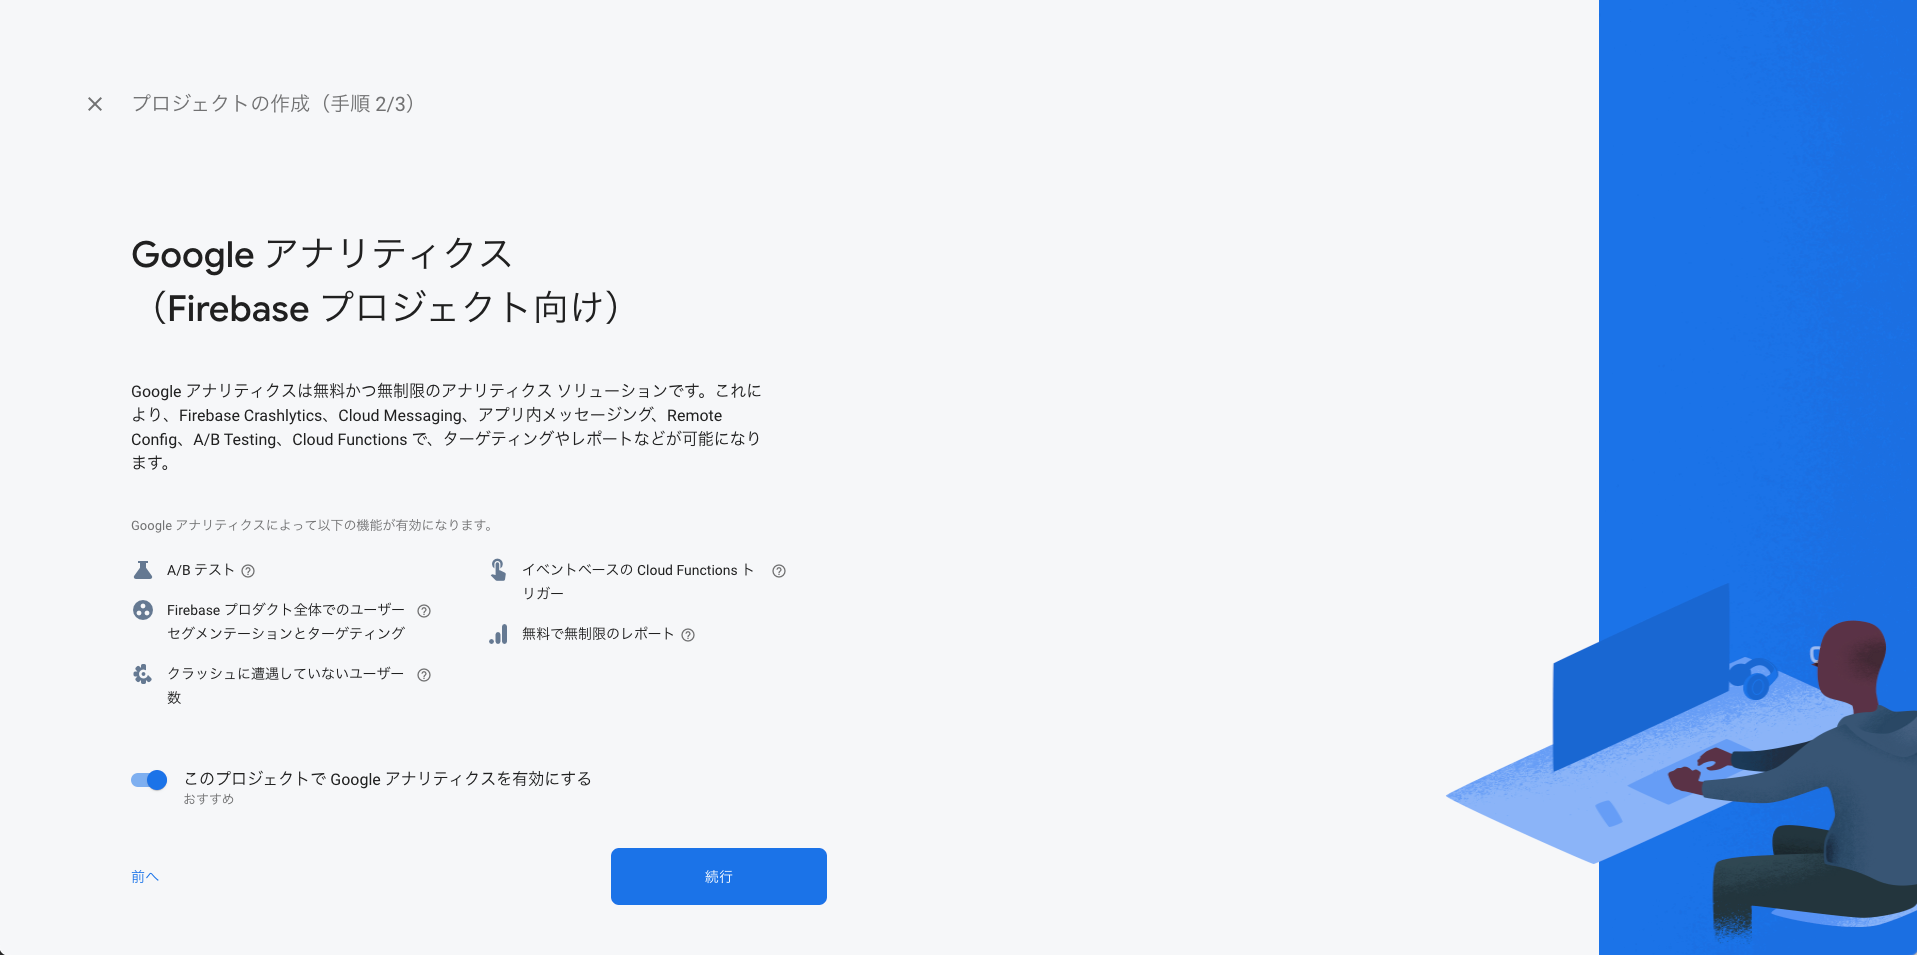

6. プロジェクトの作成(3/3) が表示されるので、Googleアナリティクス利用規約を確認し、`プロジェクトを作成`


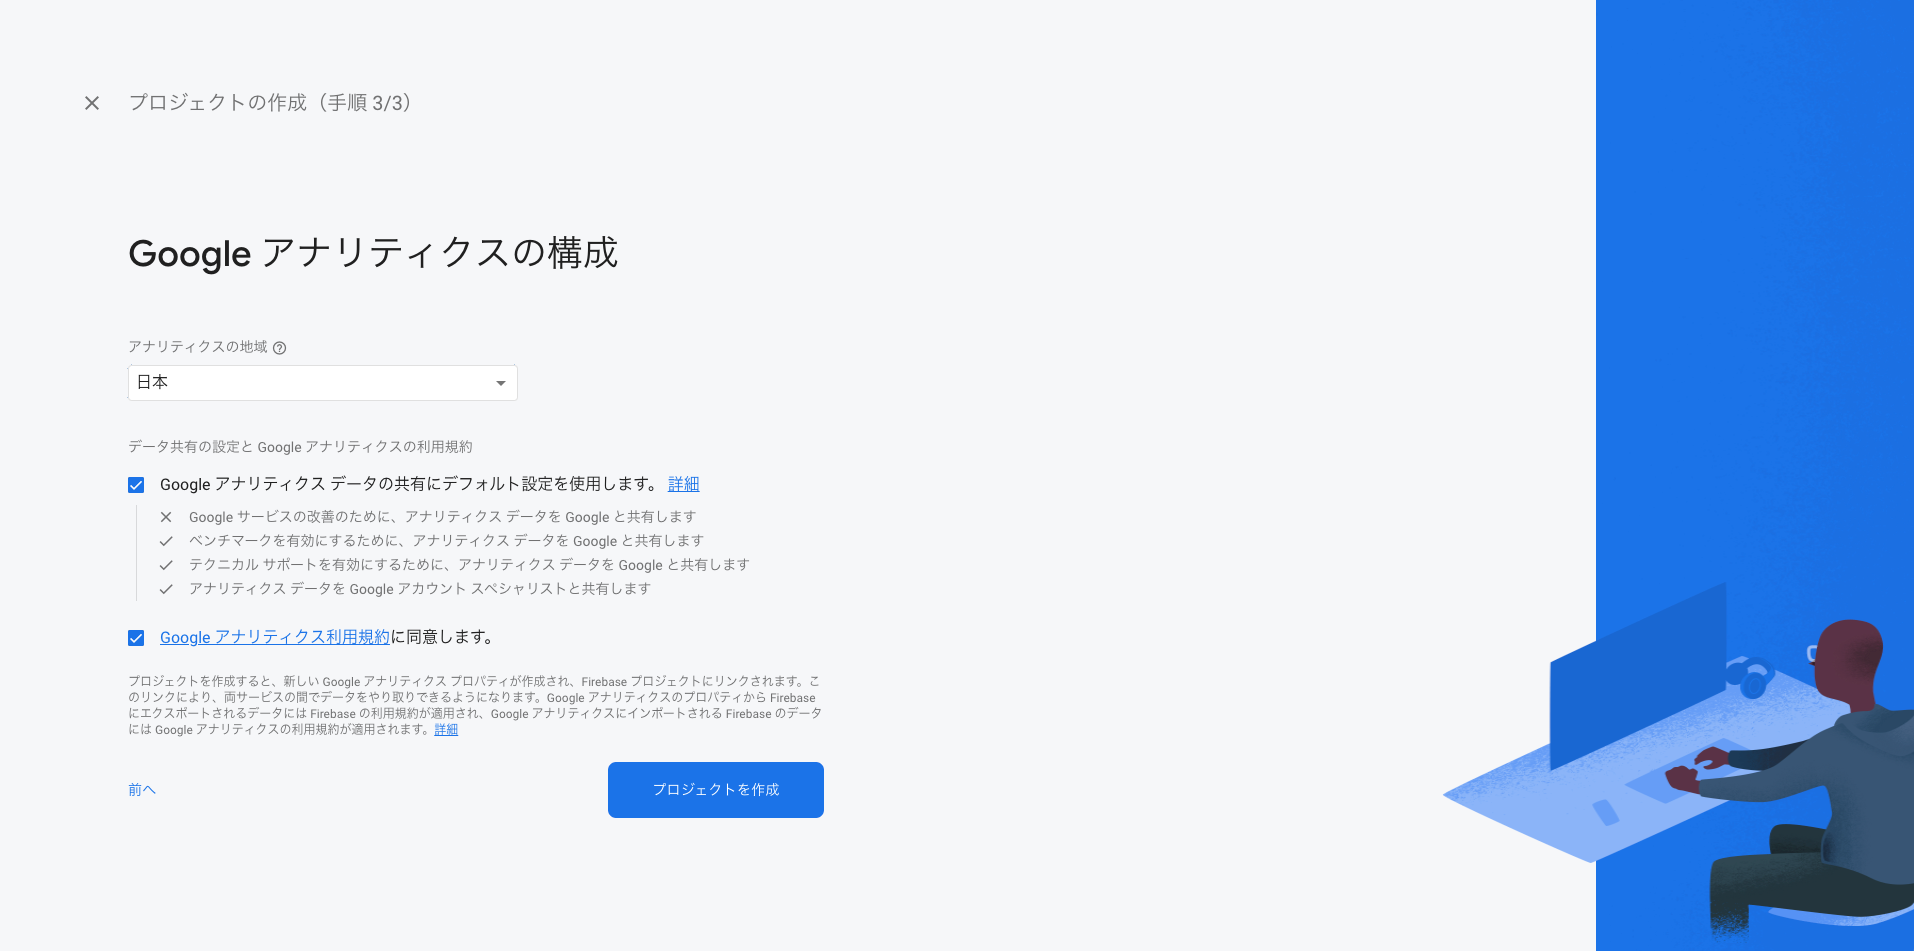

7. 新しいプロジェクトの準備ができました、と表示されたら`続行`

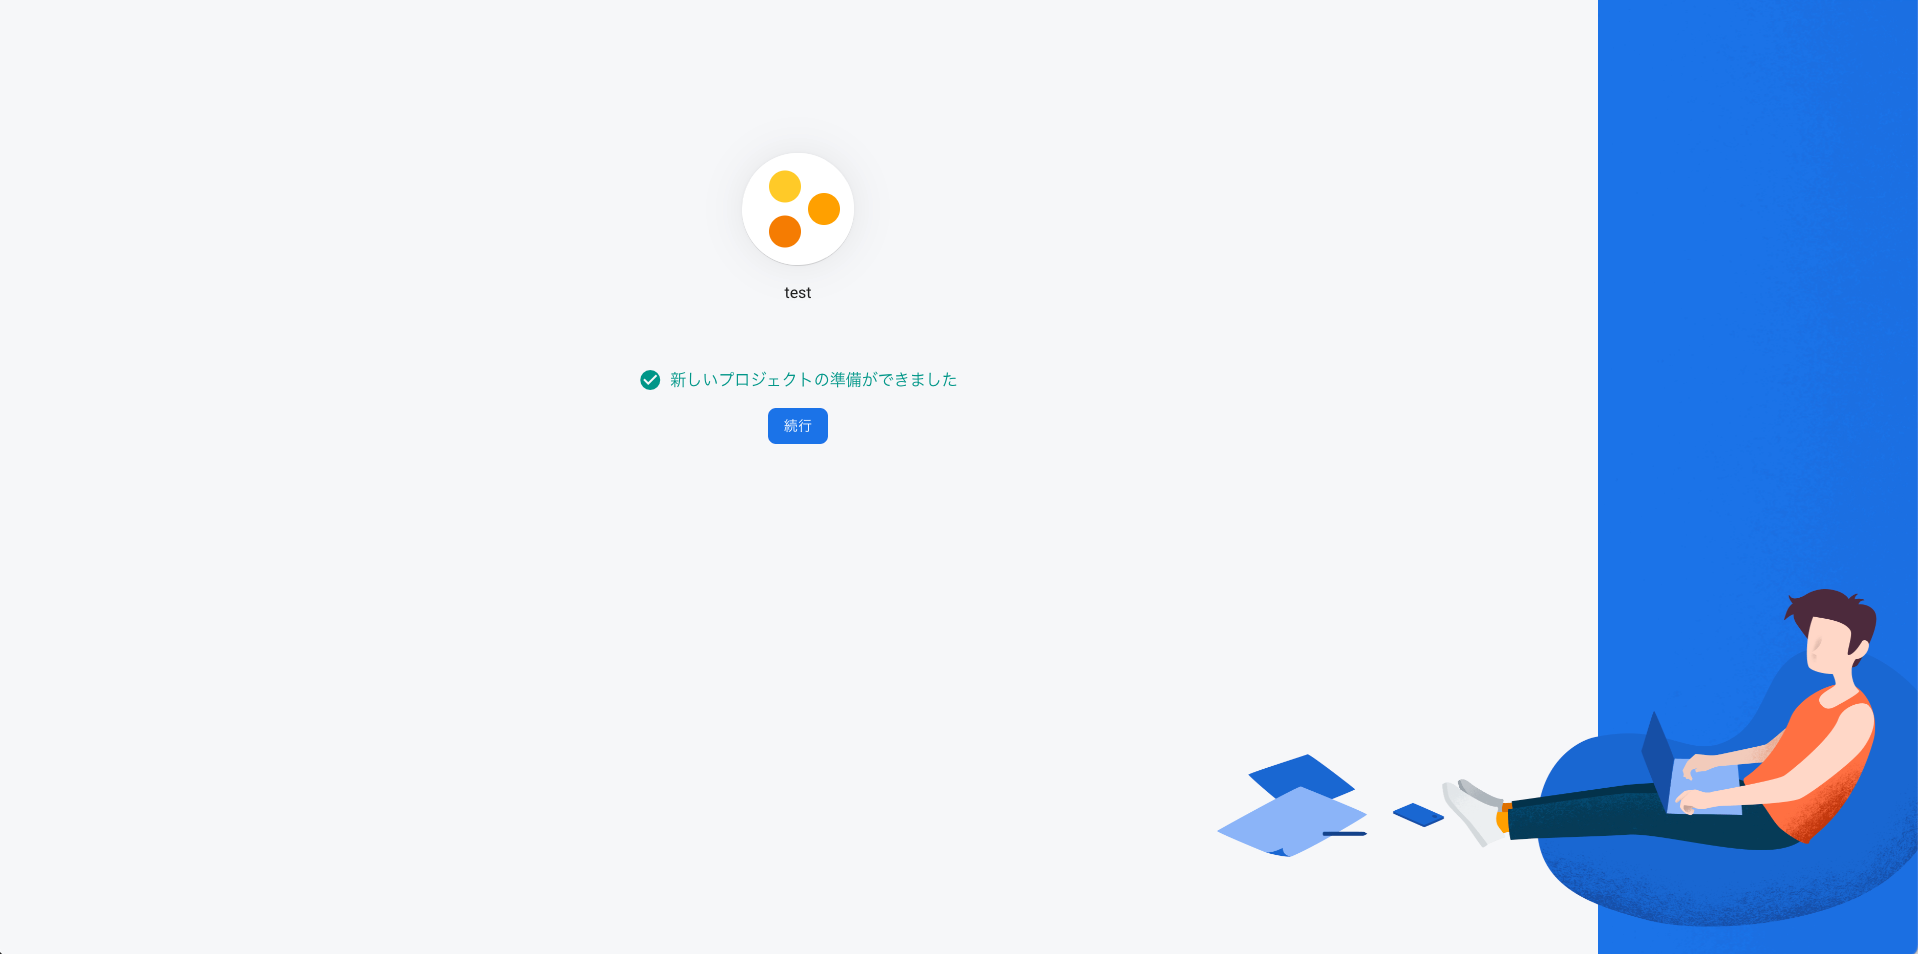

8. プロジェクトの概要が表示される。Firebaseプロジェクトの作成手順は以上。

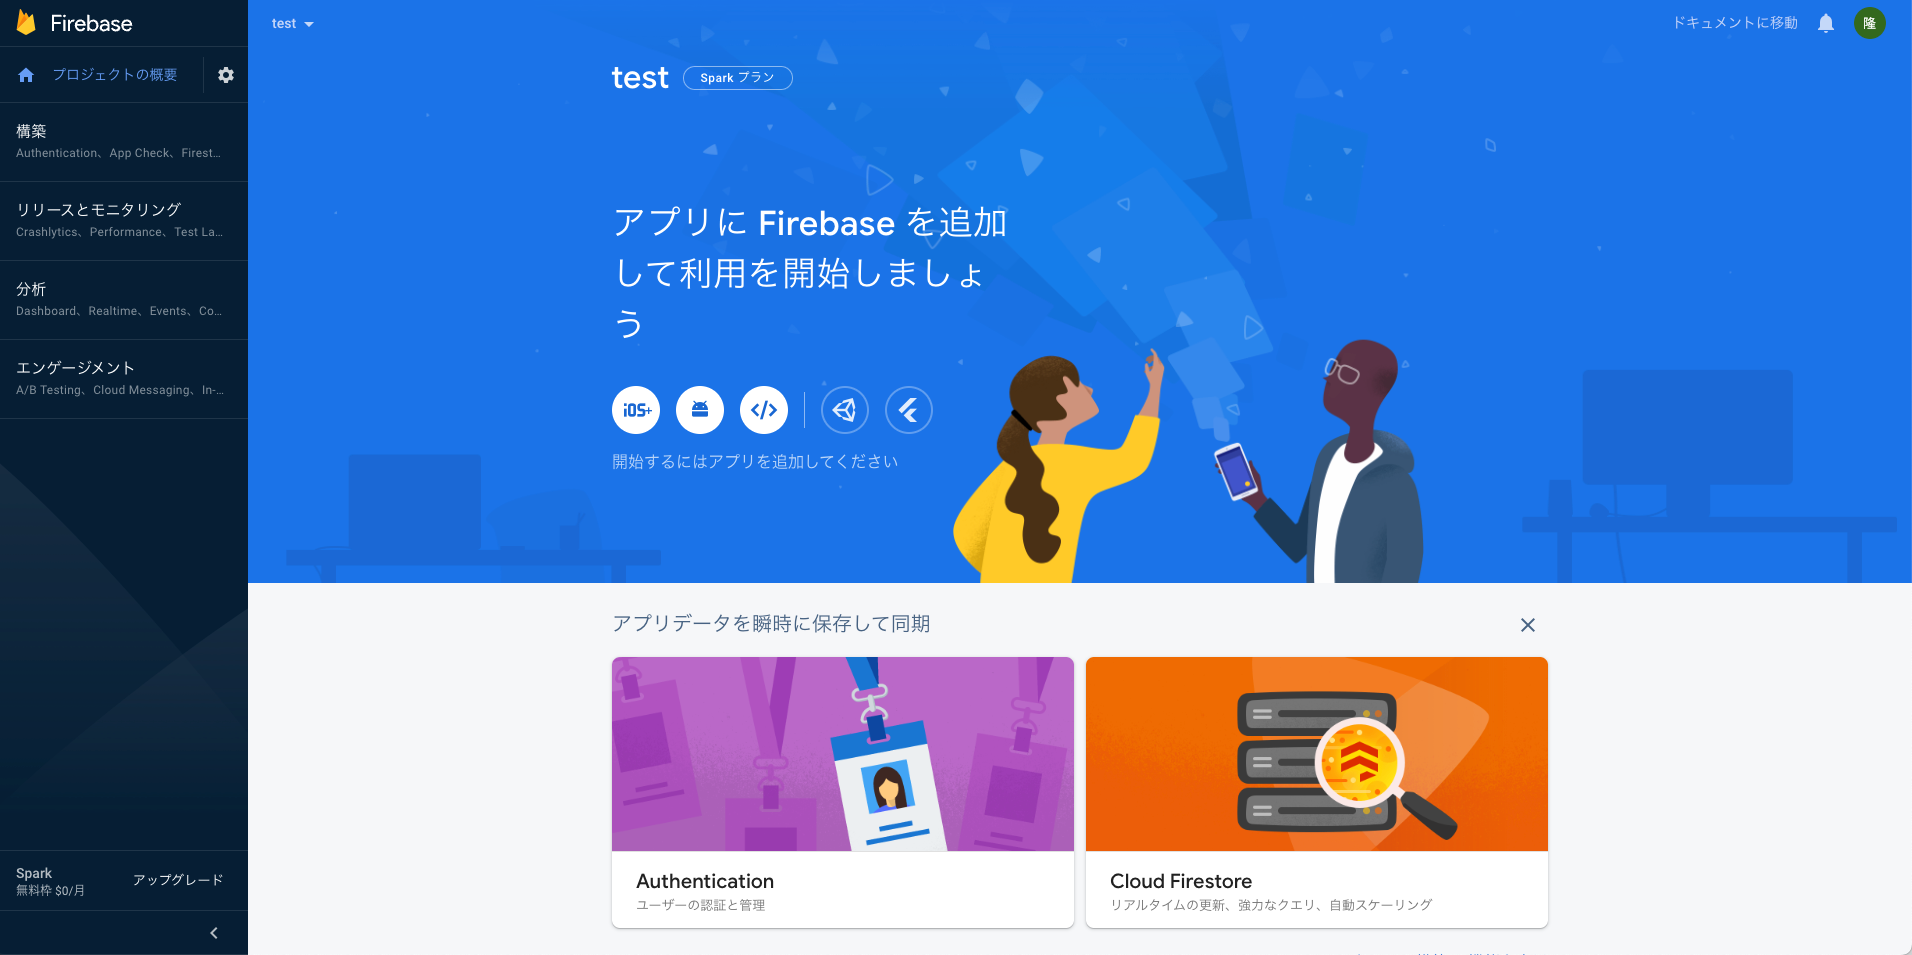

## Firebase Command Line Interface (CLI)をインストール

Firebase CLIは、Firebase プロジェクトのテスト、管理、デプロイをコマンドラインから行うためのソフトウェア。

### Node.jsのインストール

Firebase CLIをインストールするためには、Node.jsが必要。

MacにNote.jsがインストールされているか確認。

```
% node -v
zsh: command not found: node
```

インストールされていない。

nodebrewを使う方法もあるようだが、(参考: [MacにNode\.jsをインストール \- Qiita](https://qiita.com/kyosuke5_20/items/c5f68fc9d89b84c0df09))まずは、[公式](https://nodejs.org/en/)に乗っかって、パッケージをインストールする。

[Download \| Node\.js](https://nodejs.org/en/download/current/)から最新のmacOS Installerをダウンロードして、インストールする。

インストールされたバージョンを確認。

```
% node -v
v18.0.0
% npm -v
8.6.0
```

Node.jsは18.0.0、npmは8.6.0がインストールされた。

### firebase-toolsをインストール

npmを使って、Firebase CLIをインストールする。パッケージ名は`firebase-tools`

```
% sudo npm install -g firebase-tools
Password:
npm WARN deprecated har-validator@5.1.3: this library is no longer supported
npm WARN deprecated debug@4.1.0: Debug versions >=3.2.0 <3.2.7 || >=4 <4.3.1 have a low-severity ReDos regression when used in a Node.js environment. It is recommended you upgrade to 3.2.7 or 4.3.1. (https://github.com/visionmedia/debug/issues/797)
npm WARN deprecated debug@4.1.1: Debug versions >=3.2.0 <3.2.7 || >=4 <4.3.1 have a low-severity ReDos regression when used in a Node.js environment. It is recommended you upgrade to 3.2.7 or 4.3.1. (https://github.com/visionmedia/debug/issues/797)
npm WARN deprecated uuid@3.4.0: Please upgrade  to version 7 or higher.  Older versions may use Math.random() in certain circumstances, which is known to be problematic.  See https://v8.dev/blog/math-random for details.
npm WARN deprecated request@2.88.2: request has been deprecated, see https://github.com/request/request/issues/3142

added 688 packages, and audited 689 packages in 27s

35 packages are looking for funding
  run `npm fund` for details

21 vulnerabilities (15 moderate, 6 high)

To address all issues, run:
  npm audit fix

Run `npm audit` for details.
```

インストールされたバージョンを確認する

```
% firebase --version
10.8.0
```

### Firebase CLIでGoogleアカウント

1. `firebase login`を実行する

```
% firebase login
```

2. Firebase が CLI の使用状況やエラー報告情報を収集することを許可するか聞かれるので、Y or nを入力する

```
i  Firebase optionally collects CLI usage and error reporting information to help improve our products. Data is collected in accordance with Google's privacy policy (https://policies.google.com/privacy) and is not used to identify you.

? Allow Firebase to collect CLI usage and error reporting information? (Y/n)
```
3. ログインのためのURLが表示され、自動的にブラウザが開かれる
    - ブラウザが開かれない場合はURLをブラウザへコピーし、開く

```
i  To change your data collection preference at any time, run `firebase logout` and log in again.

Visit this URL on this device to log in:
<URL>
Waiting for authentication...
```

4. 許可をクリック


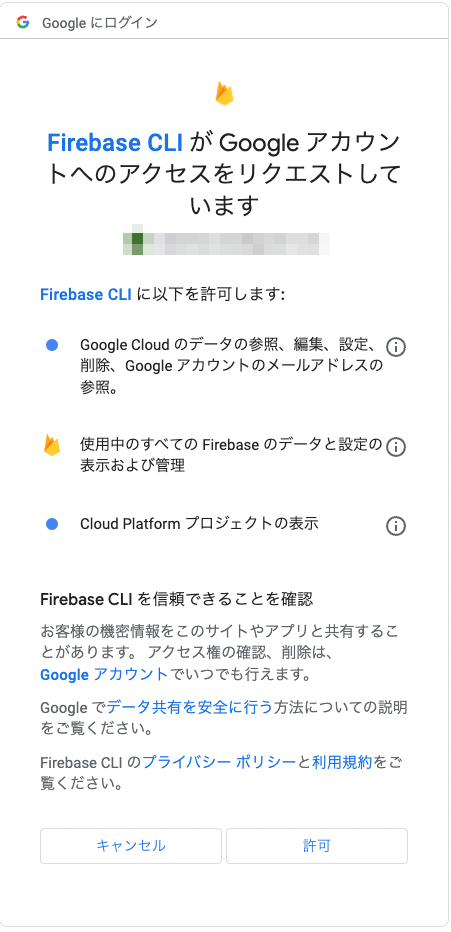

5. ログインに成功すると、以下のように表示される。ブラウザは閉じて良い。

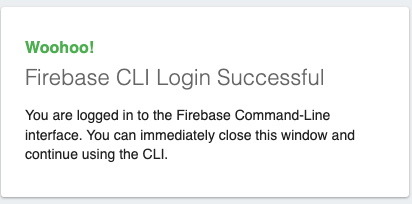

6. ターミナルには、以下のように表示される。

```
✔  Success! Logged in as <Googleアカウント>
```

## 静的コンテンツをデプロイする

### フォルダを初期化する

1. 適当なディレクトリを作成し、そのディレクトリへ移動する

```
% mkdir firebase-test
% cd test
```

2. `firebase init`コマンドでディレクトリを初期化する
    - このディレクトリで使用するfirebaseの機能を聞かれる
    - 今回は静的コンテンツをホスティングするだけなので、 `Hosting: Configure files for Firebase Hosting and (optionally) set up GitHub Action deploys`を選択する

```
% firebase init

     ######## #### ########  ######## ########     ###     ######  ########
     ##        ##  ##     ## ##       ##     ##  ##   ##  ##       ##
     ######    ##  ########  ######   ########  #########  ######  ######
     ##        ##  ##    ##  ##       ##     ## ##     ##       ## ##
     ##       #### ##     ## ######## ########  ##     ##  ######  ########

You're about to initialize a Firebase project in this directory:

  <directory path>

? Which Firebase features do you want to set up for this directory? Press Space to select features, then Enter to
 confirm your choices. (Press <space> to select, <a> to toggle all, <i> to invert selection, and <enter> to proce
ed)
❯◯ Realtime Database: Configure a security rules file for Realtime Database and (optionally) provision default in
stance
 ◯ Firestore: Configure security rules and indexes files for Firestore
 ◯ Functions: Configure a Cloud Functions directory and its files
 ◯ Hosting: Configure files for Firebase Hosting and (optionally) set up GitHub Action deploys
 ◯ Hosting: Set up GitHub Action deploys
 ◯ Storage: Configure a security rules file for Cloud Storage
(Move up and down to reveal more choices)
```

3. プロジェクトへの関連付けを設定する
    - 今回は、最初に作成したプロジェクトに関連づけたいので、`Use an existing project`を選択する

```
=== Project Setup

First, let's associate this project directory with a Firebase project.
You can create multiple project aliases by running firebase use --add,
but for now we'll just set up a default project.

? Please select an option:
❯ Use an existing project
  Create a new project
  Add Firebase to an existing Google Cloud Platform project
  Don't set up a default project
```

4. 関連付けるプロジェクトを選択する

```
? Select a default Firebase project for this directory:
❯ test-be918 (test)
```

5. 公開するディレクトリを設定する
    - 今回はデフォルト(public)のままにする

```
=== Hosting Setup

Your public directory is the folder (relative to your project directory) that
will contain Hosting assets to be uploaded with firebase deploy. If you
have a build process for your assets, use your build's output directory.

? What do you want to use as your public directory? (public)
```

6. SPA(single page application)用の設定を行うか否か
    - 今回はNを選択

```
? Configure as a single-page app (rewrite all urls to /index.html)? (y/N)
```

7. GitHubからの自動デプロイを設定するか否か
    - 今回はNを選択

```
? Set up automatic builds and deploys with GitHub? (y/N)
```

8. 以上の設定を終えると、フォルダの初期化が行われる

```
✔  Wrote public/404.html
✔  Wrote public/index.html

i  Writing configuration info to firebase.json...
i  Writing project information to .firebaserc...
i  Writing gitignore file to .gitignore...

✔  Firebase initialization complete!
```


フォルダ内に、ファイル・フォルダが作成されている

```
% tree
.
├── firebase.json
└── public
    ├── 404.html
    └── index.html
```

### ローカルで確認する

firebaseのエミュレータを使用して、ローカルで動作確認を行う

1. 現在のfirebase.jsonを確認する

```
{
  "hosting": {
    "public": "public",
    "ignore": [
      "firebase.json",
      "**/.*",
      "**/node_modules/**"
    ]
  }
}
```

2. エミュレータの設定を追加する
    - localhost:8080 で確認できるよう設定する

```
{
  "hosting": {
    "public": "public",
    "ignore": [
      "firebase.json",
      "**/.*",
      "**/node_modules/**"
    ]
  },
  "emulators": {
    "hosting": {
      "host": "localhost",
      "port": "8080"
    }
  }
}
```

3. エミュレータを起動する

```
% firebase emulators:start
i  emulators: Starting emulators: hosting
i  hosting: Serving hosting files from: public
✔  hosting: Local server: http://localhost:8080
⚠  emulators: The Emulator UI requires a project ID to start. Configure your default project with 'firebase use' or pass the --project flag.

┌─────────────────────────────────────────────────────────────┐
│ ✔  All emulators ready! It is now safe to connect your app. │
└─────────────────────────────────────────────────────────────┘

┌──────────┬────────────────┐
│ Emulator │ Host:Port      │
├──────────┼────────────────┤
│ Hosting  │ localhost:8080 │
└──────────┴────────────────┘
  Emulator Hub running at localhost:4400
  Other reserved ports: 4500

Issues? Report them at https://github.com/firebase/firebase-tools/issues and attach the *-debug.log files.
```

4. ブラウザでアクセスする
    - 今回は、エミュレータが localhost:8080 でホストするよう設定したので、ブラウザで localhost:8080 にアクセスする
    - 以下のように表示されれば成功

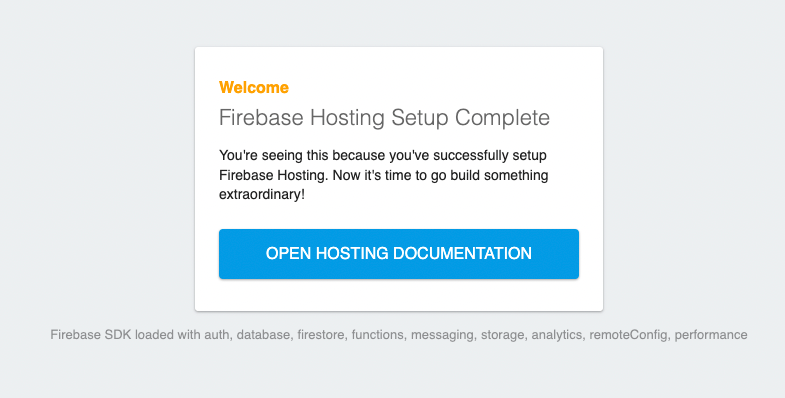

5. エミュレータを終了する
    - Ctrl + Cで終了します

```
i  emulators: Received SIGINT (Ctrl-C) for the first time. Starting a clean shutdown.
i  emulators: Please wait for a clean shutdown or send the SIGINT (Ctrl-C) signal again to stop right now.
i  emulators: Shutting down emulators.
i  hosting: Stopping Hosting Emulator
i  hub: Stopping emulator hub
i  logging: Stopping Logging Emulator
```

### デプロイする

1. `firebase deploy`コマンドでデプロイを行う

```
% firebase deploy

=== Deploying to 'test-be918'...

i  deploying hosting
i  hosting[test-be918]: beginning deploy...
i  hosting[test-be918]: found 2 files in public
✔  hosting[test-be918]: file upload complete
i  hosting[test-be918]: finalizing version...
✔  hosting[test-be918]: version finalized
i  hosting[test-be918]: releasing new version...
✔  hosting[test-be918]: release complete

✔  Deploy complete!

Project Console: https://console.firebase.google.com/project/test-be918/overview
Hosting URL: https://test-be918.web.app
```

2. `Hosting URL` にデプロイされたURLが表示されるので、ブラウザでそのURLにアクセスする
    - 以下のように表示されれば成功

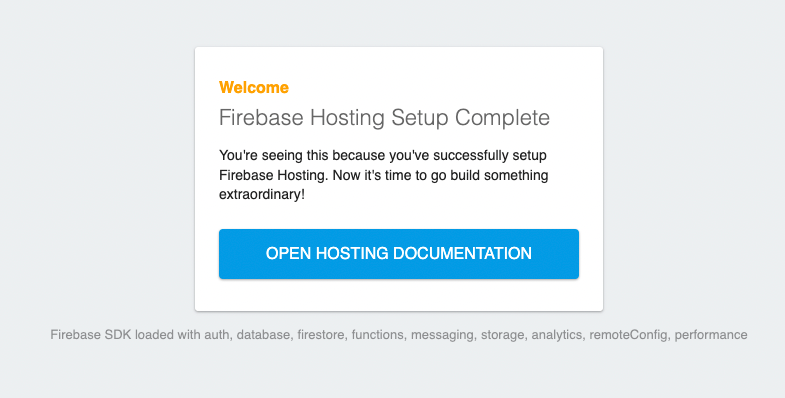